<a id = 'toc'></a>
# Table of contents

- # [Decision Tree](#5.1)


[UP](#toc)

<a id = '5.1'></a>
# 5.2 Decision Tree

## Decision Tree for classification problem

### Dataset description

The banknote dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.

### Features of the dataset
- **Variance** of Wavelet Transformed image (continuous).
- **Skewness** of Wavelet Transformed image (continuous).
- **Kurtosis** of Wavelet Transformed image (continuous).
- **Entropy** of image (continuous).
- **Class** (integer).

In [264]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_validate 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

from sklearn.tree import export_graphviz
from graphviz import Source

### Access Dataset

In [265]:
df = pd.read_csv('Upload/5.2.bill.csv')

print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

df.info()

Number of Rows: 1372
Number of Features: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [266]:
duplicated = df.duplicated()
print(f'Number of duplicated data: {df[duplicated == True].shape[0]}')

Number of duplicated data: 24


In [267]:
print(f"Number of Authenticated Banknotes: {df[df['Class'] == 1].shape[0]}")
print(f"Number of Unauthenticated Banknotes: {df[df['Class'] == 0].shape[0]}")

Number of Authenticated Banknotes: 610
Number of Unauthenticated Banknotes: 762


Correlation:
Class       1.000000
Curtosis    0.155883
Entropy    -0.023424
Skewness   -0.444688
Variance   -0.724843
Name: Class, dtype: float64


<Axes: >

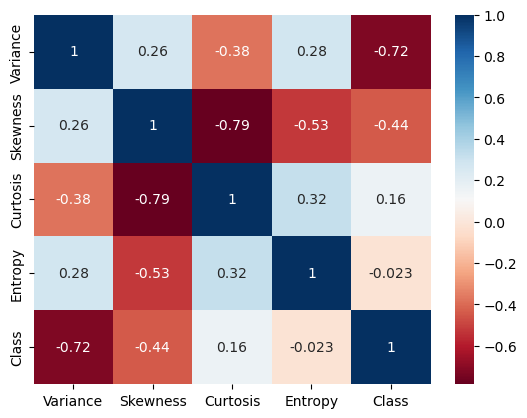

In [268]:
print('Correlation:')
print(df.corr()['Class'].sort_values(ascending = False))
sns.heatmap(df.corr(), cmap = 'RdBu', annot = True)

### Data Visualization

<Axes: xlabel='Entropy', ylabel='Count'>

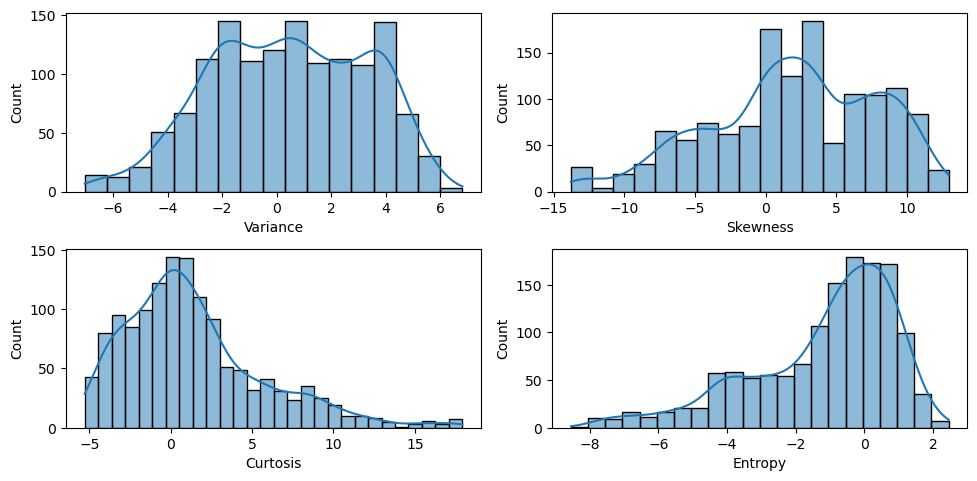

In [269]:
fig, axes = plt.subplots(2, 2, figsize = (10, 5))
fig.tight_layout(pad=2.0)

sns.histplot(data = df, x = 'Variance', kde = True, ax = axes[0, 0])
sns.histplot(data = df, x = 'Skewness', kde = True, ax = axes[0, 1])
sns.histplot(data = df, x = 'Curtosis', kde = True, ax = axes[1, 0])
sns.histplot(data = df, x = 'Entropy', kde = True, ax = axes[1, 1])

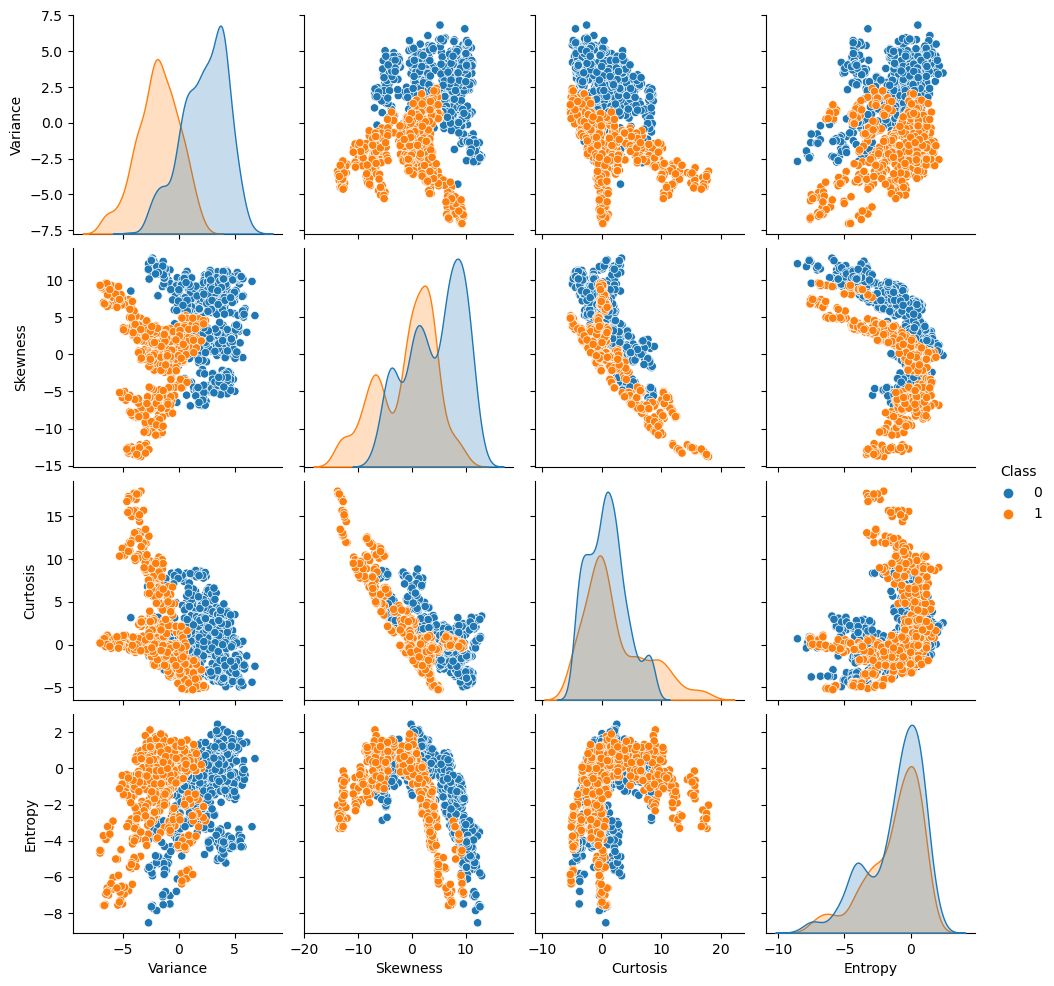

In [270]:
sns.pairplot(df, kind = 'scatter', hue = 'Class')

### DecisionTreeClassifier

In [271]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 11)

clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [293]:
# export_graphviz(clf, out_file = "clf_tree.dot", feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy']
#                 , class_names='Class', rounded=True, filled=True, proportion = True)

# Source.from_file("clf_tree.dot")

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       232
           1       0.97      0.98      0.98       180

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



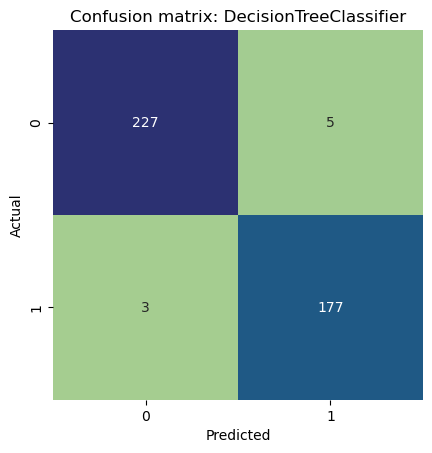

In [292]:
print('Classification report:')
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred)
            , annot = True
            , cmap ='crest'
            , cbar = False
            , fmt = '.0f'
            , square = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix: DecisionTreeClassifier');

#### Adding some additional parameters for small sample size 
- max_depth
- max_features
- min_samples_leaf

Use cross-validation to check for overfitting.

Splits: 5
[train] F1-Score: 0.92 +/- 0.02
[test] F1-Score: 0.91 +/- 0.03


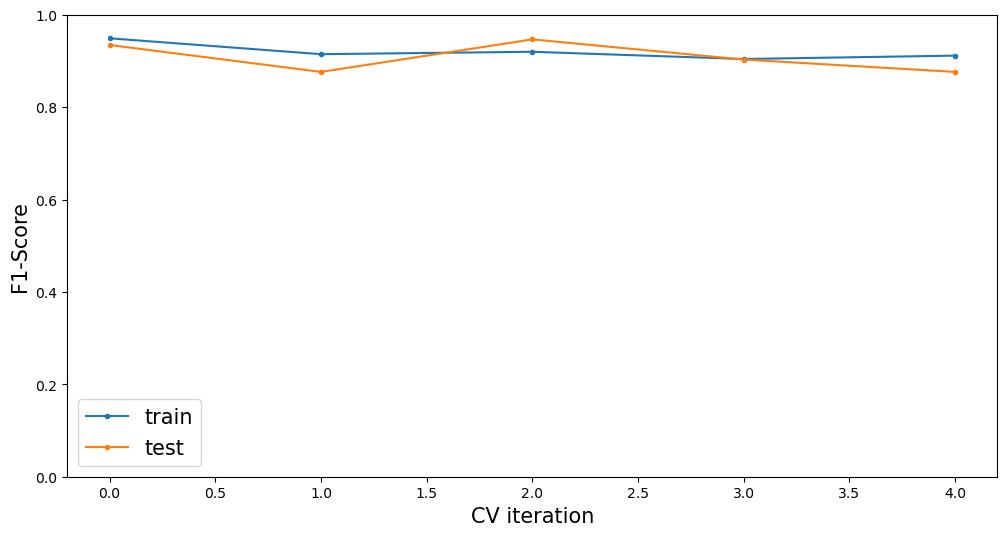

In [298]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

sss = StratifiedShuffleSplit(n_splits = 5
                            , test_size = .3
                            , random_state = 11)

print(f'Splits: {sss.get_n_splits(X, y)}')

clf = DecisionTreeClassifier(max_depth = 3
                             , max_features = 2
                             , min_samples_leaf = 4
                             , random_state = 17)

cv_metrics = cross_validate(clf, X, y
                            , cv = sss
                            , scoring = 'f1_micro'
                            , return_train_score = True)

def plot_cv_metrics(cv_metrics):
    avg_f1_train, std_f1_train = cv_metrics['train_score'].mean(), cv_metrics['train_score'].std()
    avg_f1_test, std_f1_test = cv_metrics['test_score'].mean(), cv_metrics['test_score'].std()
    print(f'[train] F1-Score: {avg_f1_train:.2f} +/- {std_f1_train:.2f}')
    print(f'[test] F1-Score: {avg_f1_test:.2f} +/- {std_f1_test:.2f}')
    
    plt.figure(figsize = (12, 6))
    
    plt.plot(cv_metrics['train_score'], label = 'train', marker = '.')
    plt.plot(cv_metrics['test_score'], label = 'test', marker = '.')
    
    plt.ylim([0., 1.])
    plt.xlabel('CV iteration', fontsize = 15)
    plt.ylabel('F1-Score', fontsize = 15)
    plt.legend(fontsize = 15)
    
    plt.show()
    
plot_cv_metrics(cv_metrics)

### Проверка MSE

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Upload/5.2.petrol.csv')

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y
                                                    , test_size = .3
                                                    , random_state = 42)

model = DecisionTreeRegressor(random_state = 42)
model.fit(x_train, y_train)

#y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#rmse_train = np.sqrt(mean_squared_error(y_pred_train, y_train))
rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test))

#print(f'[train] RMSE: {rmse_train:.2f}, max_depth: {model.tree_.max_depth}')
print(f'[test] RMSE: {rmse_test:.2f}, max_depth: {model.tree_.max_depth}')

[test] RMSE: 87.97, max_depth: 11


[UP](#toc)

<a id = '5.4'></a>
# 5.4 Решающие деревья

In [112]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree
from sklearn.datasets import make_classification

import numpy as np

In [113]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Генерация данных

In [114]:
classification_problem = datasets.make_classification(n_features = 2
                                                      , n_informative = 2, 
                                                      n_classes = 3
                                                      , n_redundant=0
                                                      , n_clusters_per_class=1
                                                      , random_state=3)

In [115]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

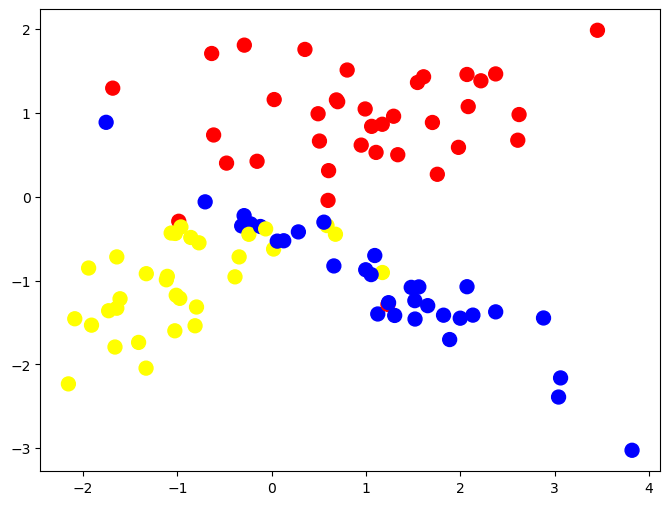

In [116]:
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0]
                       , classification_problem[0]))
              , list(map(lambda x: x[1]
                         , classification_problem[0])), 
              c=classification_problem[1], cmap=colors, s=100)


In [117]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                 classification_problem[1], 
                                                 test_size = 0.3,
                                                 random_state = 1)

## Модель DecisionTreeClassifier

In [118]:
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_labels)

predictions = clf.predict(test_data)
print(f'Accuracy: {round(accuracy_score(test_labels, predictions), 2)}')

predictions

Accuracy: 0.77


array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 1, 2, 0])

## Разделяющая поверхность

### Легкий пример для понимания работы np + matplotlib

In [119]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step)
                       , np.arange(y_min, y_max, step))

In [120]:
def plot_decision_surface(estimator, train_data, train_labels
                          , test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()]
                                                 )).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1]
                   , c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(
        metrics.accuracy_score(train_labels
                               , estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1]
                   , c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(
        metrics.accuracy_score(test_labels, estimator.predict(test_data))))

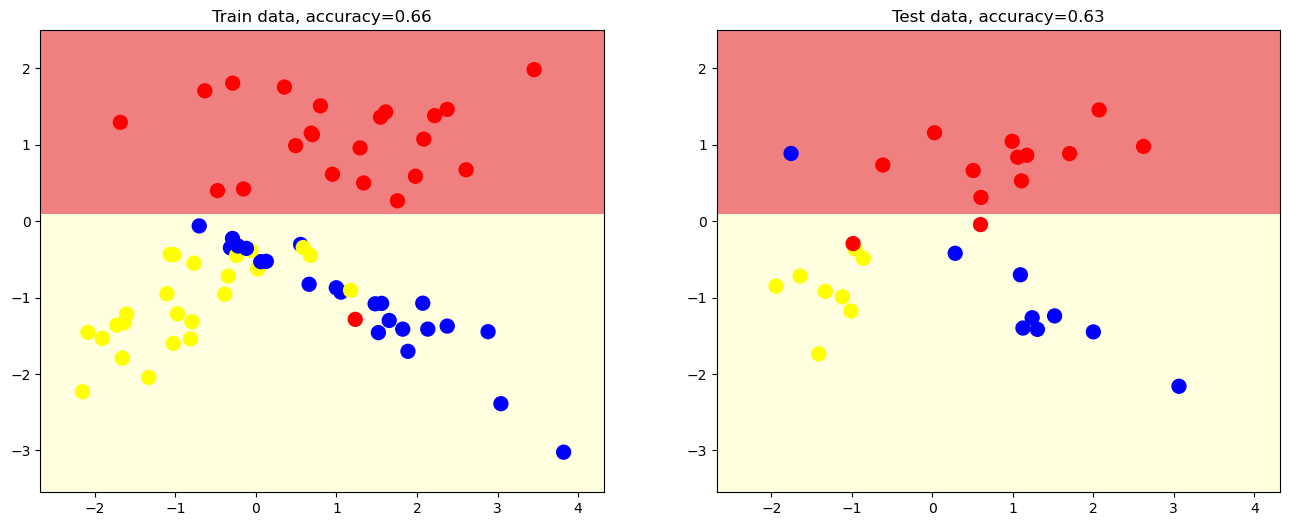

In [121]:
clf = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision_surface(clf, train_data, train_labels
                      , test_data, test_labels)

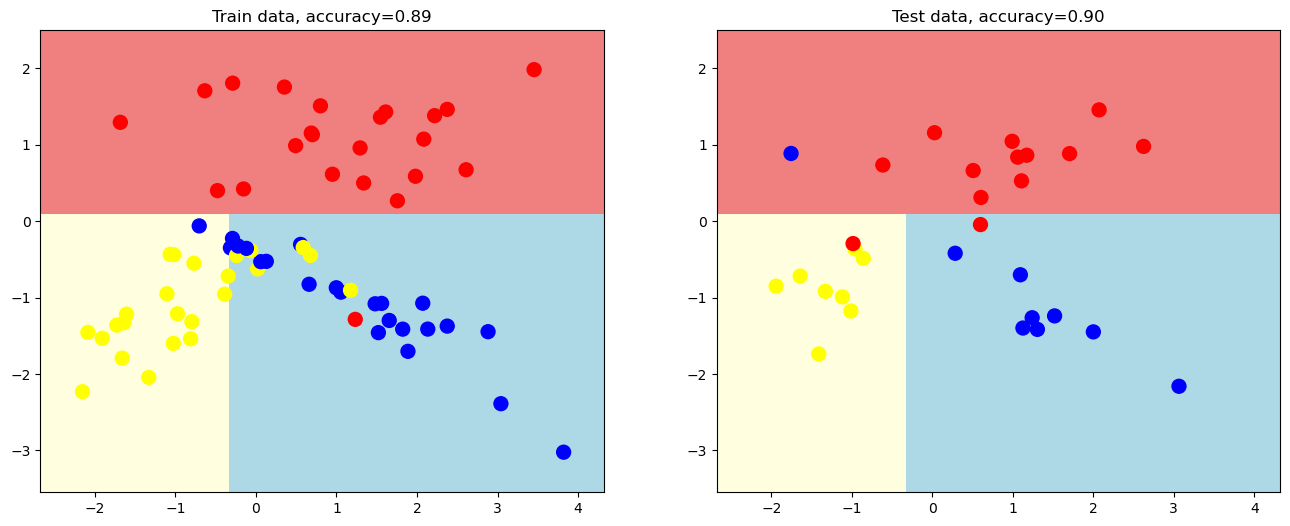

In [122]:
clf = tree.DecisionTreeClassifier(random_state = 1, max_depth = 2)

plot_decision_surface(clf, train_data, train_labels
                      , test_data, test_labels)

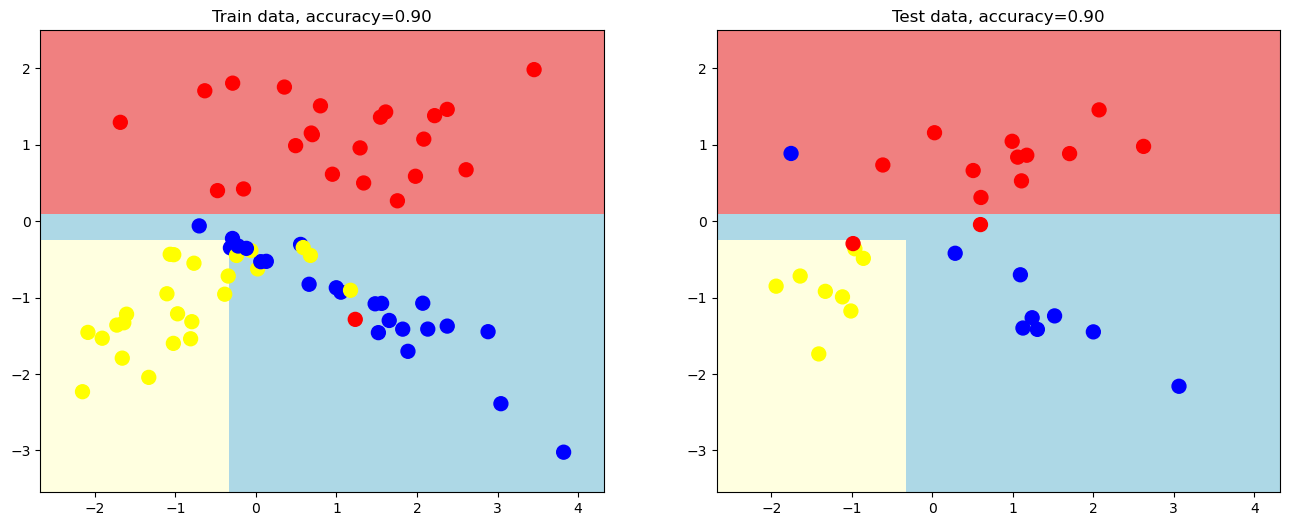

In [123]:
clf = tree.DecisionTreeClassifier(random_state = 1, max_depth = 3)

plot_decision_surface(clf, train_data, train_labels
                      , test_data, test_labels)

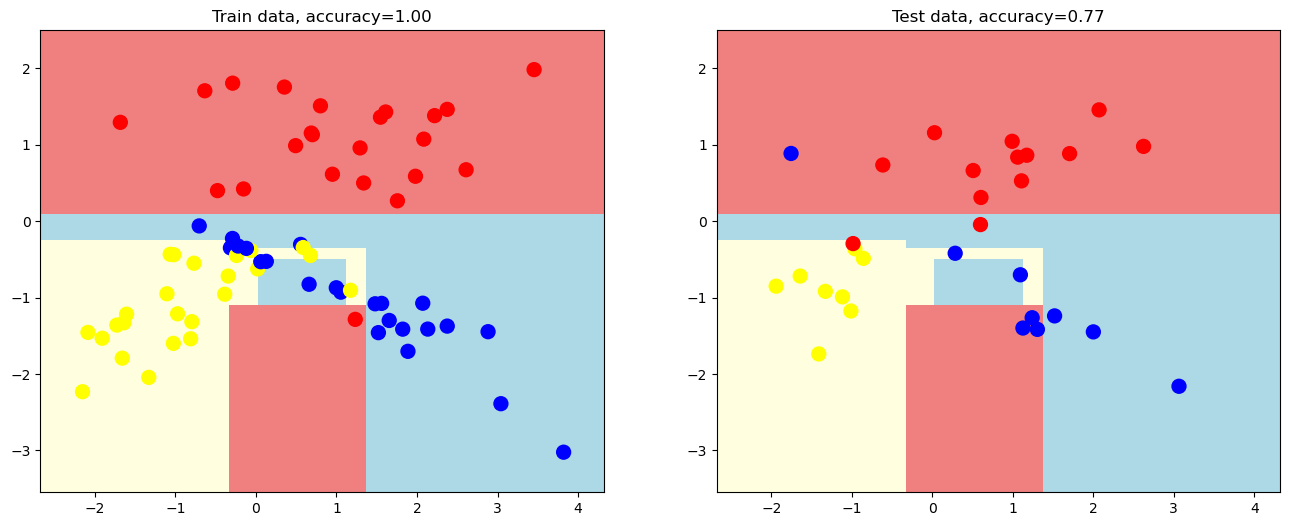

In [124]:
clf = tree.DecisionTreeClassifier(random_state = 1)

plot_decision_surface(clf, train_data, train_labels
                      , test_data, test_labels)

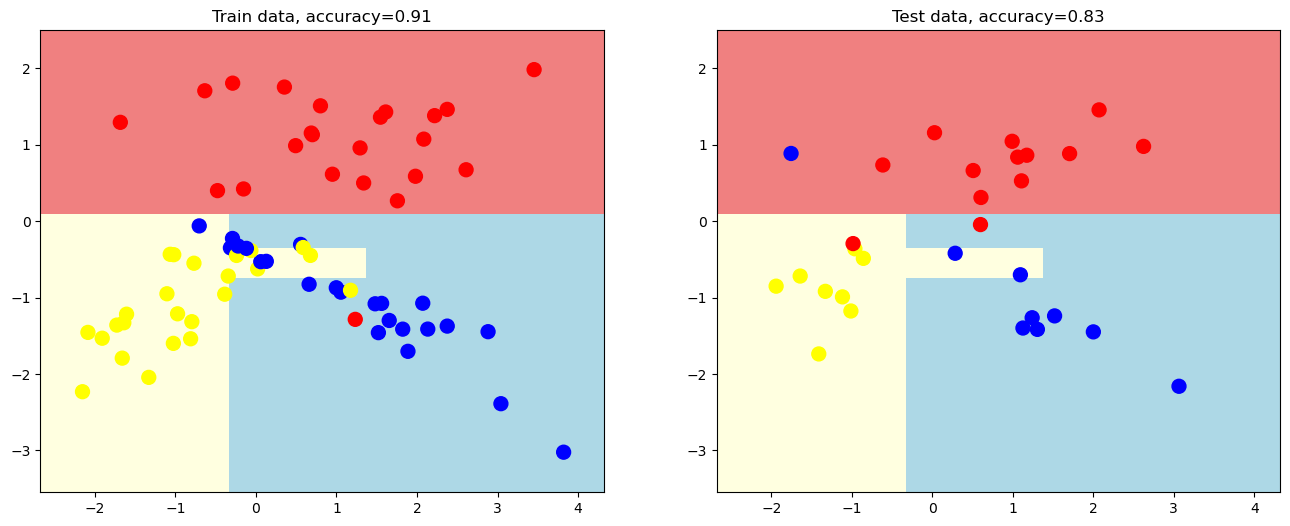

In [130]:
clf = tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 4)

plot_decision_surface(clf, train_data, train_labels
                      , test_data, test_labels)

[UP](#toc)

In [3]:
from sklearn import model_selection, datasets, metrics, tree
import pandas as pd
import numpy as np